# BioE 131 Lab 2

In [1]:
#Author: Shirley Zhou

In [25]:
from Bio import SeqIO
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np

## Load, Align, and Analyze Sequences

### Load

Given the sequence file in FASTA format, first we want to read the it using `SeqIO.parse`.

In [3]:
seq_obj = SeqIO.parse("seqs.fa", "fasta") 

#create a dictionary object for later use/reference
seq = {}

for seq_rec in seq_obj:
    seq[seq_rec.id] = seq_rec

seq

{'bb.1': SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='bb.1', name='bb.1', description='bb.1', dbxrefs=[]),
 'bb.2': SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='bb.2', name='bb.2', description='bb.2', dbxrefs=[]),
 'cy.2': SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='cy.2', name='cy.2', description='cy.2', dbxrefs=[]),
 'cy.3': SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='cy.3', name='cy.3', description='cy.3', dbxrefs=[]),
 'cy.4': SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggc...taa', SingleLetterAlphabet()), id='cy.4', name='cy.4', description='cy.4', dbxrefs=[]),
 'cy.5': SeqRecord(seq=Seq('atggctgccgatggttatcttccagattggctcgagggcaacctctctgagggc...taa', SingleLetterAlphabet()), id='cy.5', name='cy

### Align

Use the alignment tool MUSCLE to align __seqs.fa__ into __seqs.aligned.fa__

In [4]:
!muscle -in seqs.fa -out seqs.aligned.fa


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

seqs 48 seqs, max length 2217, avg  length 2209
00:00:00     11 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     11 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:04     83 MB(5%)  Iter   1  100.00%  Align node       
00:00:04     83 MB(5%)  Iter   1  100.00%  Root alignment
00:00:05     83 MB(5%)  Iter   2  100.00%  Refine tree   
00:00:05     83 MB(5%)  Iter   2  100.00%  Root alignment
00:00:05     83 MB(5%)  Iter   2  100.00%  Root alignment
00:00:12     83 MB(5%)  Iter   3  100.00%  Refine biparts
00:00:19     83 MB(5%)  Iter   4  100.00%  Refine biparts
00:00:19     83 MB(5%)  Iter   5  100.00%  Refine biparts
00:00:19     83 MB(5%)  Iter   5  100.00%  Refine biparts


### Tree generation

Generate a phylogenetic tree, __tree.nwk__, from the aligned sequences

In [5]:
!fasttree -nt < seqs.aligned.fa > tree.nwk

FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.03 seconds
Refining topology: 22 rounds ME-NNIs, 2 rounds ME-SPRs, 11 rounds ML-NNIs
Total branch-length 0.954 after 0.45 sec2, 1 of 46 splits   
ML-NNI round 1: LogLk = -15605.734 NNIs 8 max delta 16.63 Time 0.71
Switched to using 20 rate categories (CAT approximation)1 of 20   
Rate categories were divided by 0.741 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -14232.579 NNIs 0 max delta 0.00 Time 0.86
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -14232.478 NNIs 0 max de

We can then read the tree object using `Phylo.read` and visualize using `Phylo.draw_ascii`. `Phylo.draw` is the standard method to draw a tree but `Phylo.draw_ascii` looks a little more asthetically pleasing here.

In [6]:
tree_lab2 = Phylo.read('tree.nwk', 'newick')
Phylo.draw_ascii(tree_lab2)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

### Cluster Identification

From the phylogenetic tree drawn above, we can identify some obvious clusters: <br><br>
Cluster 1: pi.1, pi.2, pi.3<br>
Cluster 2: rh.10, bb.1, bb.2<br>
Cluster 3: hu.17, hu.6<br>
Cluster 4: cy.3, cy.6, cy.4, cy.5, rh.13<br>
Cluster 5: rh.35, rh.36, rh.37<br>
Cluster 6: rh.61, rh.58, rh.64, rh.57, rh.51, rh.49, rh.53, rh.50, rh.52, hu.39<br>
Specimens in each of these clusters are very closely related to each other, as they have a common immediate(direct) ancester.<br>

Some less obvious clusters are: <br>
Cluster 7: hu.67, hu.37, hu.40, hu.66, hu.41, rh.38, hu.42, rh.2, rh.40<br>
Cluster 8: cy.2, rh.54, rh.55, rh.48, rh.62<br>
Cluster 9: hu.43, hu.48, hu.44, hu.46<br>
Cluster 10: hu.14, hu.31, hu.32, rh.43<br>
Specimens in each of these clusters are not as closely related, because their common ancester is not immediate, but two or generation apart above.<br>

In general, all the sequences within the cluster are relatively closely related, whereas the sequences from different clusters are a more distantly related (e.g. pi.1 and rh.62).

### Identify Sequences by BLAST

To compare sequences in each cluster, I randomly picked one from each obvious cluster (first 6) and printed th.

In [7]:
specimen = []
specimen_names = ["pi.3", "bb.1", "hu.17", "cy.3", "rh.36", "rh.50"]

for name in specimen_names:
    curr = seq[name]
    print(curr.id)
    print(curr.seq)


pi.3
atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggcgctgaaacctggagccccgcaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgaggcggacgccgcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataatcacgccgacgccgagtttcaagagcgtctgcaagaagatacgtcctttgggggcaacctcgggcgagcagtcttccaggccaaaaagagggtactcgagcctctgggtctggttgaggaaggcgctaagacggctcctggaaagaagcggccagtagaaccggactccagctcgggcatcggcaagtcaggccagcagcccgcgaaaaagagactgaattttgggccgactggcgactcagagtcagtgcctgacccccaacctctctcagaaccacctgcaggtccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtaatgtctcaggaaattggcattgcgattccacatggctgggcgaccgagtcatcaccaccagcactcggacctgggccctccccacctacaacaaccacctctacaagcaaatctccaacgggacctcgggaggcagcagcaacgacaacacctactttggctacagcaccccctgggggtattttgactttaacagattccactgccacttttcaccacgcgactggcagcgactcatcaacaacaactggggattccggcccaagaagctcaacttcaagctcttcaacatccaggtcaaggaggtcacccagaatgaaggcaccaagaccaccgccaataa

Then for each representative, I mannually copied the sequence into BLAST and check for for most common match for each of them.

__Cluster 1 - pi.3__ <br>
It matches "Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds" on BLAST with 100%. <br>

__Cluster 2 - bb.1__ <br>
It matches "Non-human primate Adeno-associated virus isolate AAVbb.1 capsid protein (VP1) gene, complete cds" with 100%<br>

__Cluster 3 - hu.17__ <br>
It matches "Adeno-associated virus isolate hu.17 capsid protein VP1 (cap) gene, complete cds" with 100%<br>

__Cluster 4 - cy.3__ <br>
It matches "Non-human primate Adeno-associated virus isolate AAVcy.3 capsid protein (VP1) gene, complete cds" with 100%<br>

__Cluster 5 - rh.36__ <br>
It matches "Non-human primate Adeno-associated virus isolate AAVrh.36 capsid protein (VP1) gene, complete cds" with 100%<br>

__Cluster 6 - rh.50__ <br>
It matches "Adeno-associated virus isolate rh.50 capsid protein VP1 (cap) gene, complete cds" with 100%<br>

In the search result of each representative, I see the names of other specimens within the cluster right below the name of the representative, with about 99.5% match, suggesting that the difference in sequence could be only a few base pairs (point mutations). Each of the representatives also have about 80-90% similarity to each other, probably because they are variations of the capsid protein of a certain adeno-associated virus.<br>


__Why might we not trust the annotations for sequences that come up in our BLAST?__<br>
If a sequence is evolutionarily conserved in a few very closely related species, then BLAST cannot acturately find exactly which one the sequence belongs to.

### Calculate the GC content of each cluster and Compare Length Variation Across Clusters

Let's first create a new dictionary of the aligned sequence.

In [8]:
seq_aligned_obj = SeqIO.parse("seqs.aligned.fa", "fasta") 
seq_aligned = {}

for seq_rec in seq_aligned_obj:
    seq_aligned[seq_rec.id] = seq_rec

Let's define a function that calculate the gc percentage at each bp position within a cluster

In [9]:
def gc_percentage(cluster):
    gc_per = []
    at_per = []
    for i in np.arange(len(cluster[0])):
        gc_count = 0
        ag_count = 0
        seq_num = len(cluster)
        for j in np.arange(seq_num):
            temp = cluster[j][i]
            if (temp == 'G' or temp == 'C'):
                gc_count += 1
            elif (temp == 'A' or temp == "T"):
                ag_count += 1
            #it is possible that the aligned sequence show a "-" as insertion, this should 
            #be count toward either gc or at, and we should remove it out of consideration of 
            #this single position, or the gc and at percentage do not add up to one.
            else:
                seq_num -= 1
        if (seq_num == 0):
            gc_per.append(0)
            at_per.append(0)
        else:
            gc_per.append(gc_count/seq_num)
            at_per.append(ag_count/seq_num)
    return (gc_per, at_per)

We can also define a function that draws the bar chart from each gc_percentage result.

In [44]:
def cluster_bar(gc, at, cluster_num):
    plt.figure(figsize=(20,4))
    ind = np.arange(2238)
    gc_bar = plt.bar(x = ind, 
                 height = gc)
    at_bar = plt.bar(x = ind, 
                 height = at, 
                 bottom=gc)
    plt.title('GC vs. AT content of Sequences in Cluster ' + cluster_num, fontsize=20)
    plt.xlabel('Position in Sequence')
    plt.ylabel('%GC vs. %AG')
    plt.yticks(np.arange(0, 1, 0.2))
    plt.legend((gc_bar[0], at_bar[0]), ('GC', 'AT'))
    plt.show()

The next function calculate the length of each specimen within a cluster. Note these lengths should be the original length not the length after alignment.

In [56]:
def seq_length(cluster):
    length = []
    for i in np.arange(len(cluster)):
        length.append(len(cluster[i]))
    return(length)

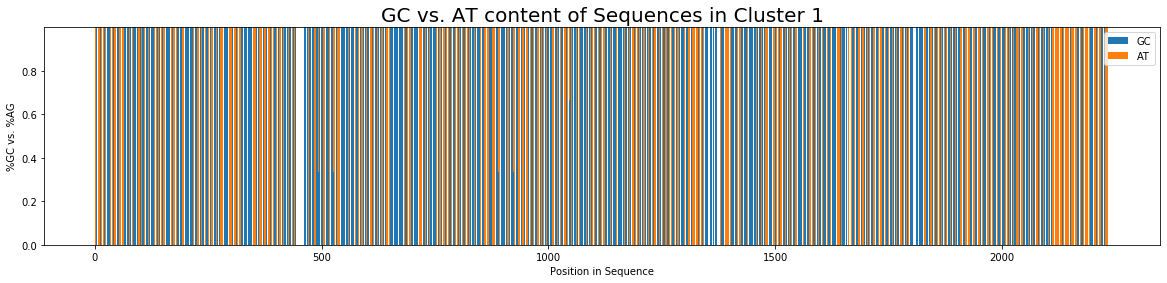

In [45]:
c1_names = ["pi.1", "pi.2", "pi.3"]
c1 = []
c1_raw = []
for name in c1_names:
    c1.append(str(seq_aligned[name].seq))
    c1_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c1)[0], gc_percentage(c1)[1], "1")

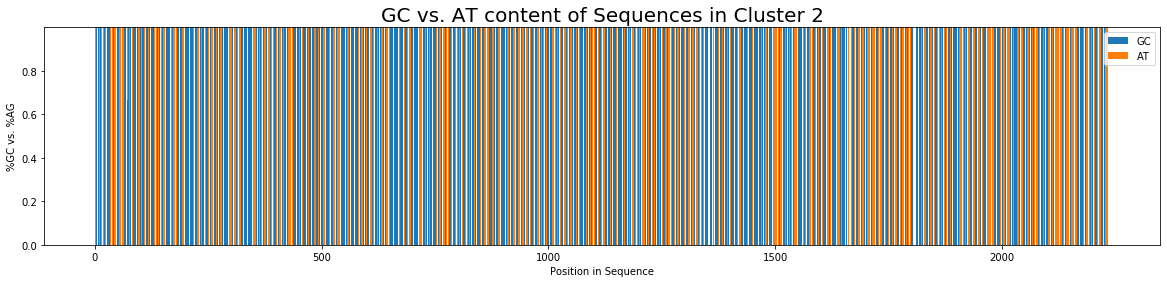

In [47]:
c2_names = ["rh.10", "bb.1", "bb.2"]
c2 = []
c2_raw = []
for name in c2_names:
    c2.append(str(seq_aligned[name].seq))
    c2_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c2)[0], gc_percentage(c2)[1], "2")

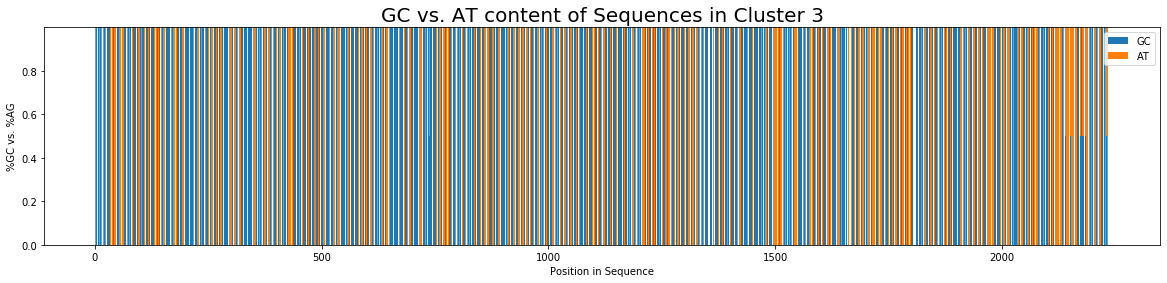

In [48]:
c3_names = ["hu.17", "hu.6"]
c3 = []
c3_raw = []
for name in c3_names:
    c3.append(str(seq_aligned[name].seq))
    c3_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c3)[0], gc_percentage(c3)[1], "3")

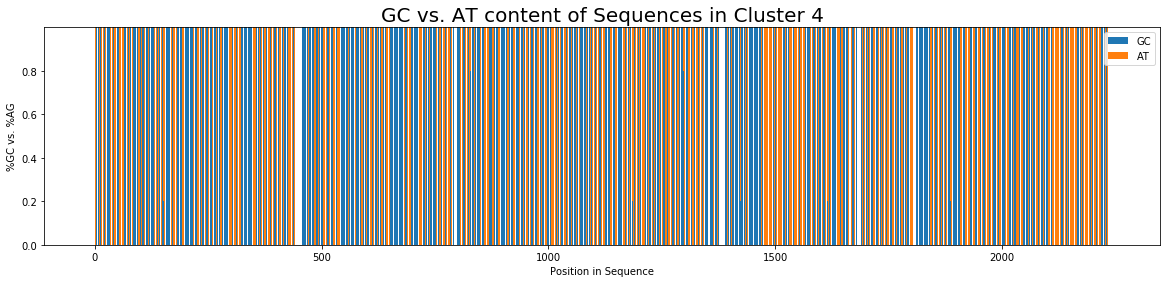

In [49]:
c4_names = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13"]
c4 = []
c4_raw = []
for name in c4_names:
    c4.append(str(seq_aligned[name].seq))
    c4_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c4)[0], gc_percentage(c4)[1], "4")

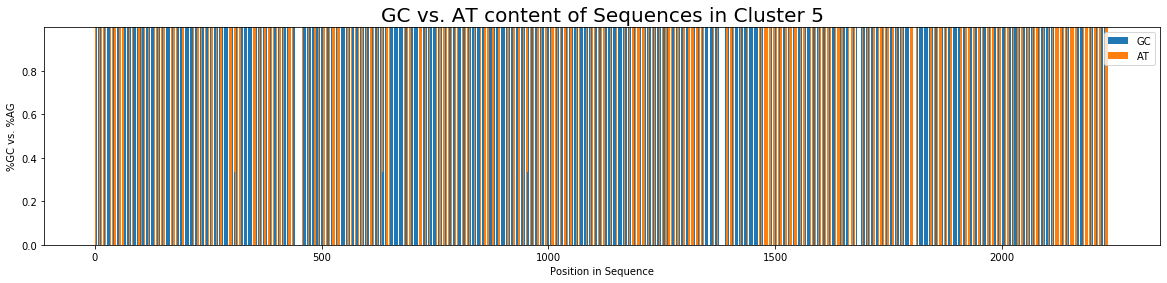

In [50]:
c5_names = ["rh.35", "rh.36", "rh.37"]
c5 = []
c5_raw = []
for name in c5_names:
    c5.append(str(seq_aligned[name].seq))
    c5_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c5)[0], gc_percentage(c5)[1], "5")

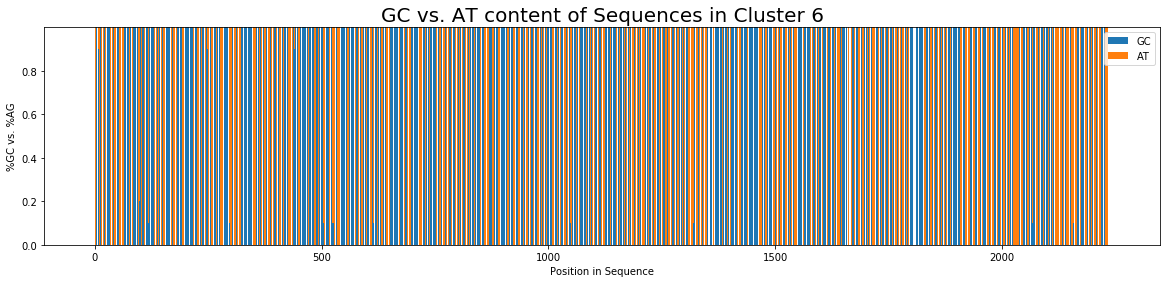

In [52]:
c6_names = ["rh.61", "rh.58", "rh.64", "rh.57", "rh.51", "rh.49", "rh.53", "rh.50", "rh.52", "hu.39"]
c6 = []
c6_raw = []
for name in c6_names:
    c6.append(str(seq_aligned[name].seq))
    c6_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c6)[0], gc_percentage(c6)[1], "6")

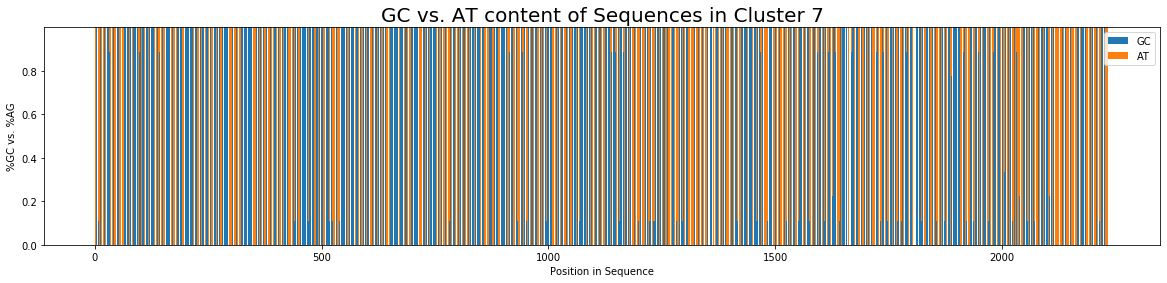

In [61]:
c7_names = ["hu.67", "hu.37", "hu.40", "hu.66", "hu.41", "rh.38", "hu.42", "rh.2", "rh.40"]
c7 = []
c7_raw = []
for name in c7_names:
    c7.append(str(seq_aligned[name].seq))
    c7_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c7)[0], gc_percentage(c7)[1], "7")

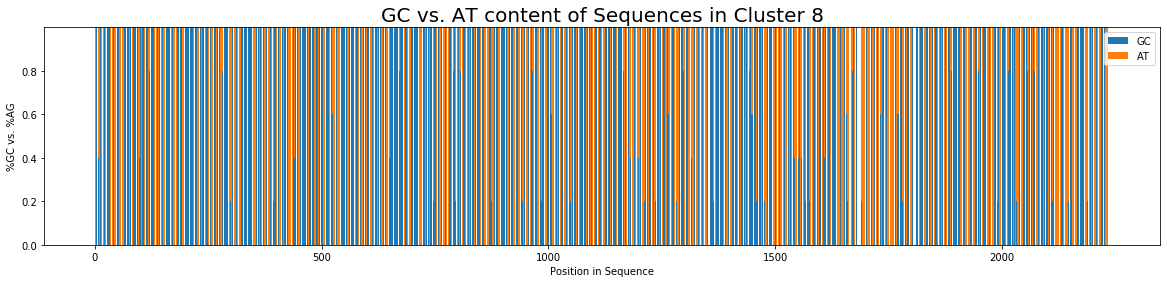

In [62]:
c8_names = ["cy.2", "rh.54", "rh.55", "rh.48", "rh.62"]
c8 = []
c8_raw = []
for name in c8_names:
    c8.append(str(seq_aligned[name].seq))
    c8_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c8)[0], gc_percentage(c8)[1], "8")

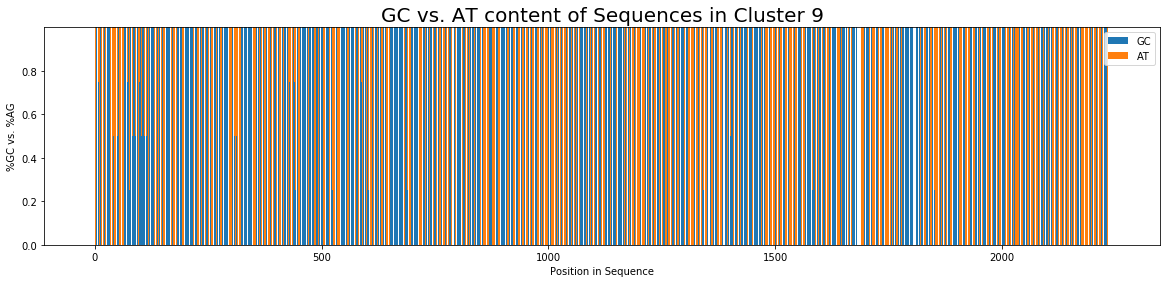

In [63]:
c9_names = ["hu.43", "hu.48", "hu.44", "hu.46"]
c9 = []
c9_raw = []
for name in c9_names:
    c9.append(str(seq_aligned[name].seq))
    c9_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c9)[0], gc_percentage(c9)[1], "9")

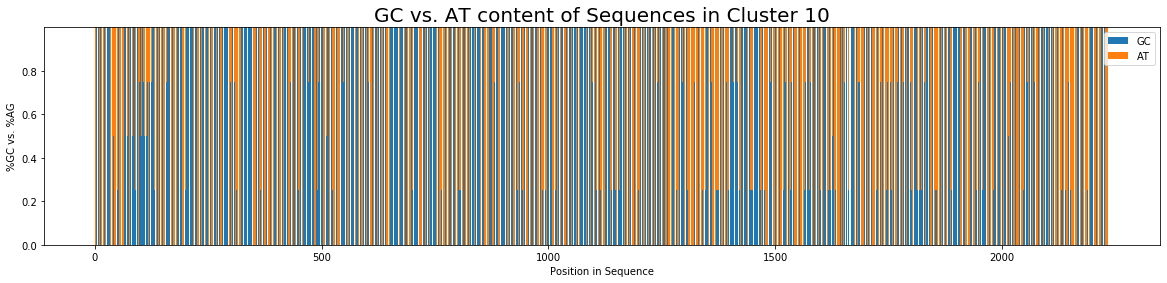

In [64]:
c10_names = ["hu.14", "hu.31", "hu.32", "rh.43"]
c10 = []
c10_raw = []
for name in c10_names:
    c10.append(str(seq_aligned[name].seq))
    c10_raw.append(str(seq[name].seq))
cluster_bar(gc_percentage(c10)[0], gc_percentage(c10)[1], "10")

In the 10 barchart above, the more obvious clusters (1-6) seems to have relatively more unanimous bp at each position (all GC or all AT). This suggests that they are more closely related. 

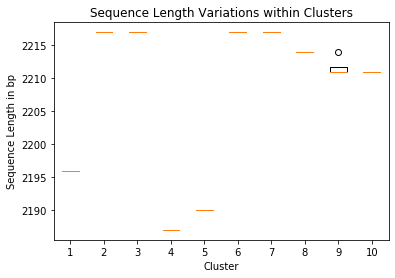

In [68]:
length_data = [seq_length(c1_raw), seq_length(c2_raw), seq_length(c3_raw), seq_length(c4_raw),
              seq_length(c5_raw), seq_length(c6_raw), seq_length(c7_raw), seq_length(c8_raw), 
              seq_length(c9_raw), seq_length(c10_raw)]
plt.boxplot(length_data)
plt.title('Sequence Length Variations within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sequence Length in bp')
plt.show()

In [69]:
seq_length(c9_raw)

[2214, 2211, 2211, 2211]

From the box plot above, we can see that each cluster has sequences of same length except for cluster 9.